In [2]:
# This is to set up the virtual environment gg
import numpy as np
from qiskit import *
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

In [3]:
# allows us to select available quantum computers
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
# specifically selected imbq_belem quantum computer and it is a 5 qubit computer
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_belem')
qbackend = Aer.get_backend('qasm_simulator')

ibmqfactory.load_account:WARNING:2022-11-22 21:15:11,966: Credentials are already in use. The existing account in the session will be replaced.


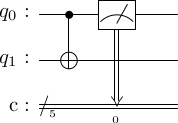

In [5]:
# code for schematics of hadamard circuit
circuit1 = QuantumCircuit(5,5)

circuit1.cnot(0, 1)
circuit1.measure(0,0)
circuit1.draw(output='latex', idle_wires=False)

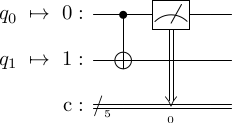

In [6]:
# transpiled hadamard circuit
circuit1_t = transpile(circuit1, backend=backend)
circuit1_t.draw(output='latex', idle_wires=False)

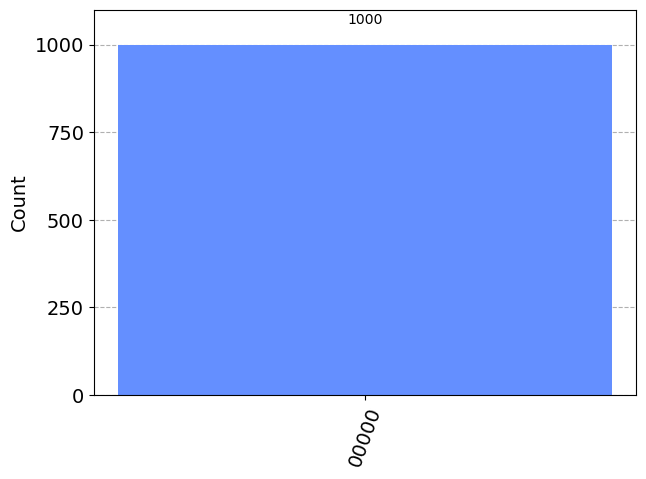

In [7]:
# This is the result we get if we used a Qiskit Simulator
job = execute(circuit1, backend=qbackend, shots=1000)
counts1 = job.result().get_counts()
plot_histogram(counts1)

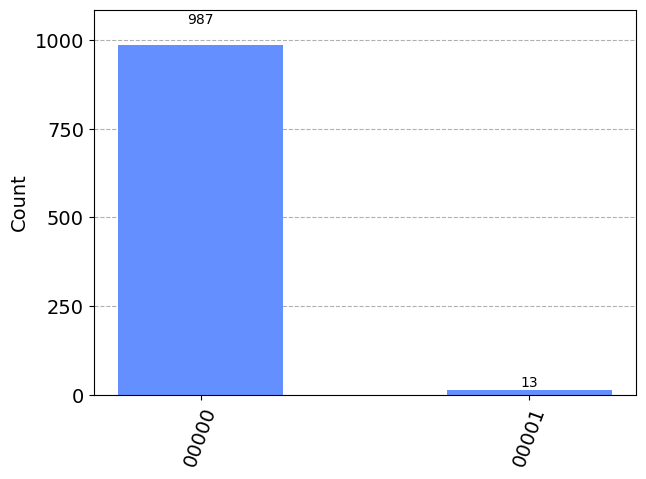

In [8]:
# This is the result we obtain by running the circuit 1000 times on an actual quantum computer
job = execute(circuit1, backend=backend, shots=1000)
counts1_t = job.result().get_counts()
plot_histogram(counts1_t)